In [1]:
import numpy as np
from classy import Class
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

lcdm = Class()
lcdm.set({
    'output': 'mPk',
    'non linear': 'none',
    'P_k_max_1/Mpc' : 150,
})
lcdm.compute()
ks = np.logspace(-3, 2, 1000)

# xs = [400, 106.4, 28.3, 7.5, 2.0]
xs = [500, 300, 100, 50, 10]
f_ref = 0.1
pks_x = []

for x in xs:
    cwdm = Class()
    omega_dm = (lcdm.Omega_m() - lcdm.Omega_b()) * lcdm.h()**2
    f_wdm = f_ref
    cwdm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'N_ncdm': 1,
        'omega_ncdm' : omega_dm * f_wdm,
        'omega_cdm' : omega_dm * (1-f_wdm),
        'T_ncdm': (omega_dm * f_wdm*93.14)**0.25 * x**-0.25 * (4./11.)**(1./3.),
        'm_ncdm': x**(3/4) * (94.1*omega_dm * f_wdm)**0.25
    }))
    cwdm.compute()
    pks_x.append(np.vectorize(cwdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

fs = [0.01, 0.032, 0.100, 0.316, 1]
x_ref = 100
pks_f = []
for f_wdm in fs:
    cwdm = Class()
    omega_dm = (lcdm.Omega_m() - lcdm.Omega_b()) * lcdm.h()**2
    x = x_ref
    cwdm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'N_ncdm': 1,
        'omega_ncdm' : omega_dm * f_wdm,
        'omega_cdm' : omega_dm * (1-f_wdm),
        'T_ncdm': (omega_dm * f_wdm*93.14)**0.25 * x**-0.25 * (4./11.)**(1./3.),
        'm_ncdm': x**(3/4) * (93.14*omega_dm * f_wdm)**0.25
    }))
    cwdm.compute()
    pks_f.append(np.vectorize(cwdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

Install Pyro to use GPR_pyro.
Install gpytorch to use GPR_GPyTorch.
Install Tensorflow to use prob_nn.
Install probflow to use prob_nn.


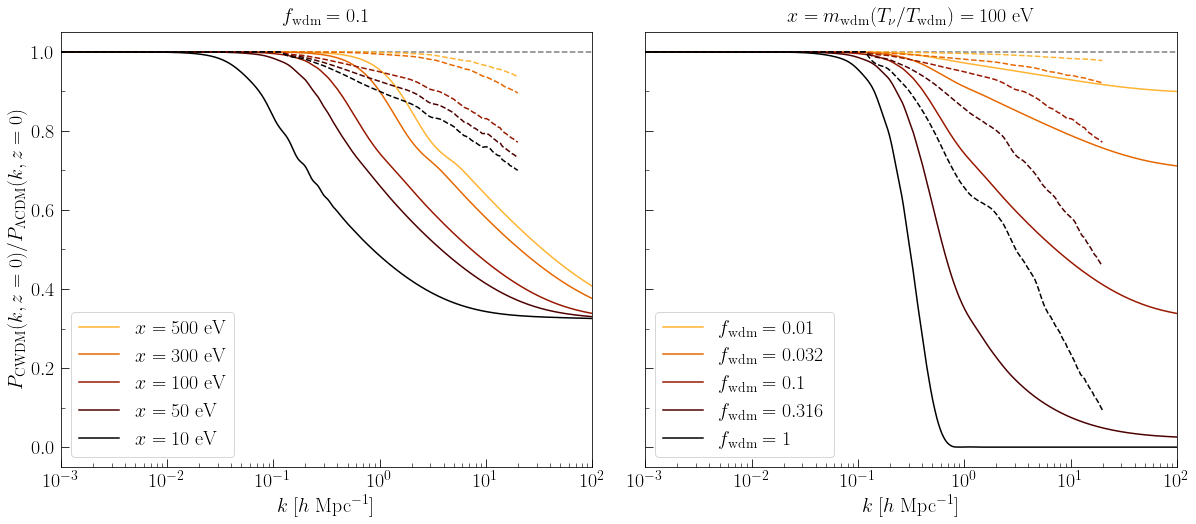

In [2]:
from matplotlib import pyplot as plt
import matplotlib.pylab as pl

import os, sys
sys.path.append("/home/justus/Uni/Software/notebooks/")
import CWDM_interpolator as CWDM


fontsize = 20
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth (20)


ax1.set_title("$f_\mathrm{wdm}=%s$" % f_ref, fontsize=fontsize, pad=10)
ax1.set_ylabel(r"$P_{\rm CWDM}(k,z=0)/P_{\Lambda{\rm CDM}}(k,z=0)$", fontsize=fontsize)
ax1.set_xlabel(r"$k\; [h\mathrm{\;Mpc}^{-1}]$", fontsize=fontsize)
ax1.set_xlim(ks[0], ks[-1])
ax1.set_ylim(-0.05,1.05)
ax1.set_xscale("log")

ax2.set_title(r"$x=m_\mathrm{wdm}(T_\nu/T_\mathrm{wdm})=%s\; \mathrm{eV}$" % x_ref, fontsize=fontsize, pad=10)
ax2.set_xlabel(r"$k\; [h\mathrm{\;Mpc}^{-1}]$", fontsize=fontsize)
ax2.set_xlim(ks[0], ks[-1])
ax2.set_ylim(-0.05,1.05)
ax2.set_xscale("log")

ax1.hlines(1, ks[0], ks[-1], linestyles="dashed", color="gray")
ax2.hlines(1, ks[0], ks[-1], linestyles="dashed", color="gray")

colours = pl.cm.afmhot(np.linspace(0,0.6,len(xs)))
for i, pk_x in enumerate(pks_x):
    ax1.plot(
        ks,
        pk_x,
        label="$x=%s\; \mathrm{eV}$" % xs[i],
        color=colours[len(fs)-1-i]
    )
    m = (94.1 * f_ref * (0.3145714273 - 0.0491989) * 0.6737 ** 2) ** (1/4) * xs[i] ** (3/4)
    a = CWDM.CWDM_suppression(ks, 0, m/1000., f_ref)[0][np.where(ks<20)]
    a[np.where(a>1)] = 1
    ax1.plot(
        ks[np.where(ks<20)],
        a,
        color=colours[len(fs)-1-i],
        linestyle="dashed"
    )

colours = pl.cm.afmhot(np.linspace(0,0.6,len(fs)))
for i, pk_f in enumerate(pks_f):
    ax2.plot(
        ks,
        pk_f,
        label="$f_\mathrm{wdm}=%s$" % fs[i],
        color=colours[len(fs)-1-i]
    )
    m = (94.1 * fs[i] * (0.3145714273 - 0.0491989) * 0.6737 ** 2) ** (1/4) * x_ref ** (3/4)
    a = CWDM.CWDM_suppression(ks, 0, m/1000., fs[i]*1.)[0][np.where(ks<20)]
    a[np.where(a>1)] = 1
    ax2.plot(
        ks[np.where(ks<20)],
        a,
        color=colours[len(fs)-1-i],
        linestyle="dashed"
    )

ax1.legend(fontsize=fontsize)
ax2.legend(fontsize=fontsize)
ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ticks_labels = ["$0.0$", "$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$"]
ticks_minor = [0.1, 0.3, 0.5, 0.7, 0.9]
empty = ["", "", "", "", "", ""]
empty_minor = ["", "", "", "", ""]
ax1.set_yticks(ticks, ticks_labels, fontsize=fontsize)
ax1.set_yticks(ticks_minor, empty_minor, minor=True)
ax2.set_yticks(ticks, empty, fontsize=fontsize)
ax2.set_yticks(ticks_minor, empty_minor, minor=True)
ax1.tick_params(length=8, labelsize=fontsize)
ax1.tick_params(length=4, labelsize=fontsize, which="minor")
ax2.tick_params(length=8, labelsize=fontsize)
ax2.tick_params(length=4, labelsize=fontsize, which="minor")
ax1.tick_params(direction='in', which="both", pad=6)
ax2.tick_params(direction='in', which="both", pad=6)

# xtick_positions = [0.001, 0.01, 0.1, 1, 10, 100]
# xtick_labels = ['$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$']
# ax1.set_xticks(xtick_positions, xtick_labels, fontsize=fontsize)
# ax2.set_xticks(xtick_positions, xtick_labels, fontsize=fontsize)

plt.subplots_adjust(wspace=0.1)

fig.savefig("/home/justus/Uni/plots/pk_lin/cwdm.pdf", bbox_inches = "tight")